# Analyze seqFISH data

Apply Squidpy for the analysis of seqFISH data. These data were obtained from [Lofoff et al. 2020](https://www.biorxiv.org/content/10.1101/2020.11.20.391896v1) and a pre-processed subset of the data in `anndata.AnnData` format is provided.

## Import packages & data

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import scanpy as sc 
import squidpy as sq

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
adata = sq.datasets.seqfish()

scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.26.2 scipy==1.11.4 pandas==2.1.3 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.11.3 louvain==0.8.1 pynndescent==0.5.11
squidpy==1.2.2


Visualize the cluster annotation in spatial context with `squidpy.pl.spatial_scatter()`.

/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


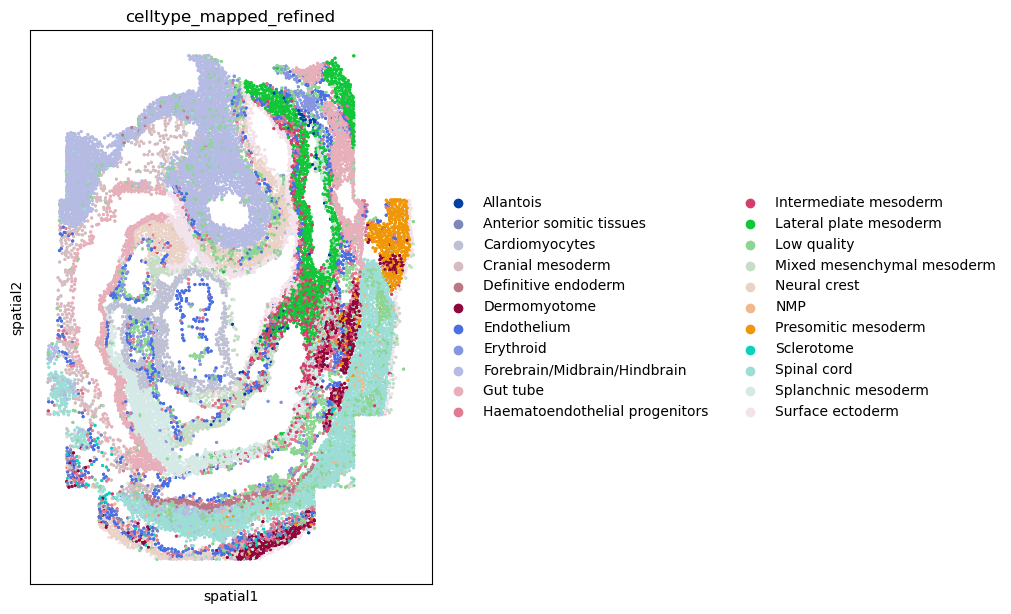

In [14]:
sq.pl.spatial_scatter(
    adata, color="celltype_mapped_refined", shape=None, figsize=(10,10)
)

## Neighborhood enrichment analysis

Compute a neighborhood enrichment score with `squidpy.gr.nhood_enrichment()`. This is an enrichment score on spatial proximity of clusters. if spots belonging to two different clusters are often close to each other, then they will have a high score and can be defined as being _enriched_. On the other hand, if they are far apart, the score will be low and they can be defined as _depleted_. This score is based on a permutation-based test, and you can set the number of permutations with the `n_perms` argument (default is 1000).

Compute a connectivity matrix with `squidpy.gr.spatial_neighbors()` and viusalize the results with `squidpy.pl.nhood_enrichment()`. Add a dendrogram to the heatmap computed with linkage method _ward_.

  0%|          | 0/1000 [00:00<?, ?/s]

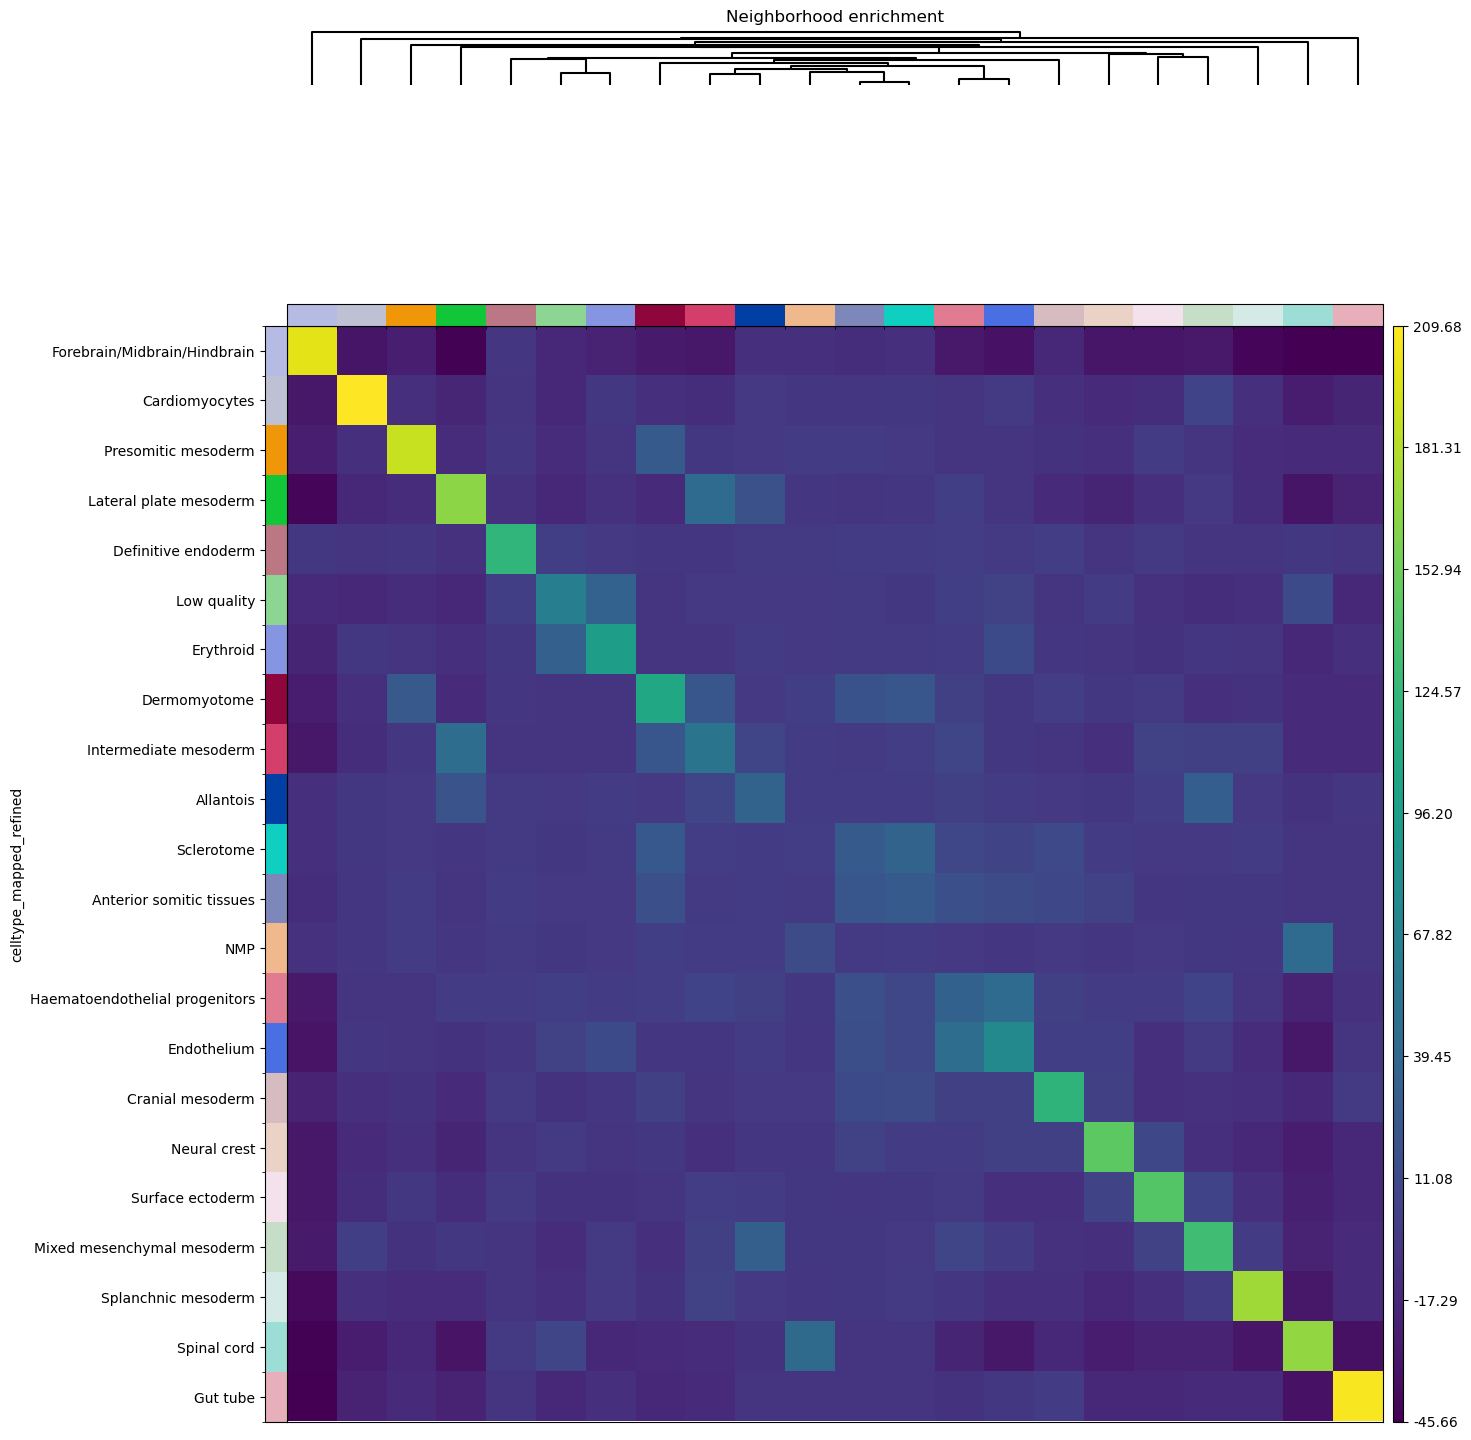

In [15]:
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="celltype_mapped_refined")
sq.pl.nhood_enrichment(adata, cluster_key="celltype_mapped_refined", method="ward")

There seems to be enrichment between _Lateral okate mesoderm_, the _Intermediete mesoderm_, and a milder enrichment for _Allantois_ cells. There also seems to be an association between the _Endothelium_ and the _Haematoendothelial progenitors_. 

Visualize the spatial organization of cells again, and appreciate the proximity of specific cell clusters using `squidpy.pl.spatial_scatter()`.

/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


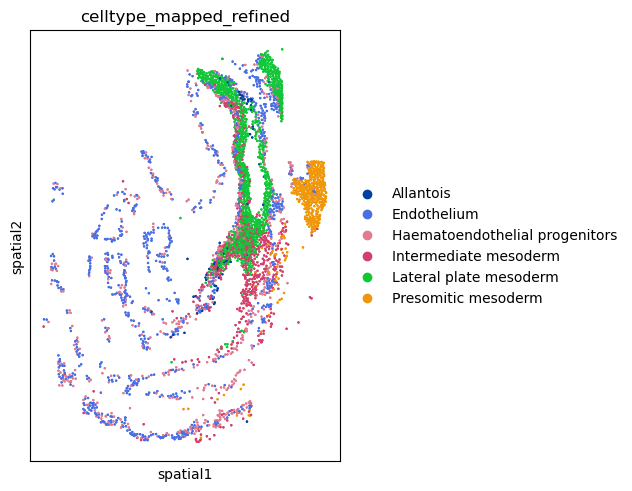

In [16]:
sq.pl.spatial_scatter(
    adata,
    color="celltype_mapped_refined",
    groups=[
        "Endothelium",
        "Haematoendothelial progenitors",
        "Allantois",
        "Lateral plate mesoderm",
        "Intermediate mesoderm",
        "Presomitic mesoderm",
    shape=None,
    size=2
)

## Co-occurrence across spatial dimensions

Visualize cluster co-occurrence in spatial dimensions. This is a similar analysis of the one presented above, yet it does not operate on the connectivity matrix, but on the original spatial coordinates.

Compute this score with `squidpy.gr.co_occurence()` and set the cluster annotation for the conditional probability with the arguemnts `clusters`. Visualize the results with `squidpy.pl.co_occurrence()`.

  0%|          | 0/1 [00:00<?, ?/s]

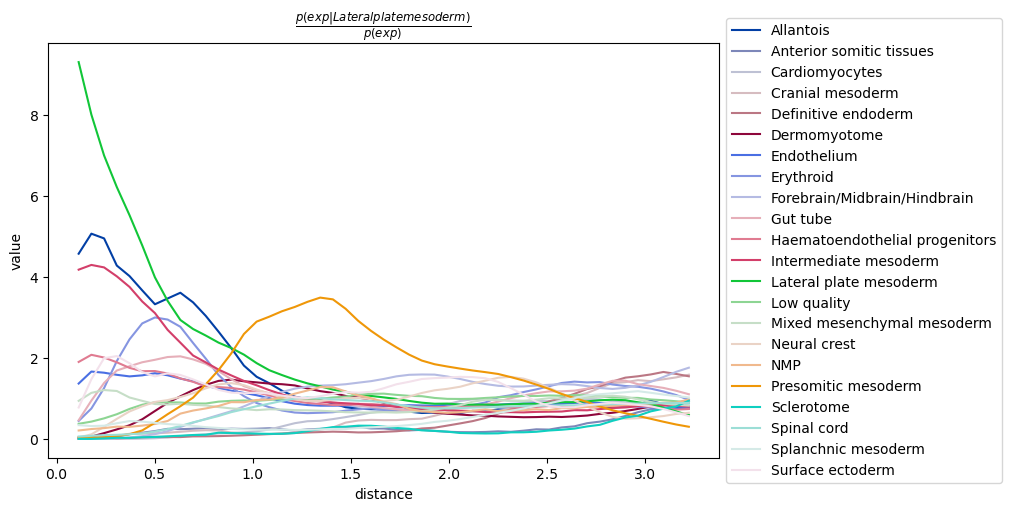

In [17]:
sq.gr.co_occurrence(adata, cluster_key="celltype_mapped_refined")
sq.pl.co_occurrence(
    adata,
    cluster_key="celltype_mapped_refined",
    clusters="Lateral plate mesoderm",
    figsize=(10, 5),
)

There is a co-occurrence between the conditional cell type annotation _Lateral plate mesoderm_ and the clusters _Itermediate mesoderm_ and _Allantois_. It also seems that at longer distances, there is a co-occurrence of cells belonging to the _Presomitic mesoderm_ cluster. By visualizing the full tissue as before we can indeed appreciate that these cell types seems to form a defined clusters relatively close to the _Lateral plate mesoderm_ cells. The distance units corresponds to the spatial coordinates saved in `adata.obsm['spatial']`. 

## Ligand-receptor interaction analysis

Perform the analysis and visualize the result for three clusters of interest: _Lateral plate mesoderm, Intermediate mesoderm_, and _Allantois_. For the visualization, filter out annotations with low-expressed genes (with the `means_range` argument) and decreasing the threshold for the adjusted p-value (with the `alpha` argument).

In [19]:
adata

AnnData object with n_obs × n_vars = 19416 × 351
    obs: 'Area', 'celltype_mapped_refined'
    uns: 'celltype_mapped_refined_colors', 'spatial_neighbors', 'celltype_mapped_refined_nhood_enrichment', 'celltype_mapped_refined_co_occurrence', 'celltype_mapped_refined_ligrec'
    obsm: 'X_umap', 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [24]:
sq.gr.ligrec(
    adata,
    n_perms=100,
    cluster_key="celltype_mapped_refined",
)
sq.pl.ligrec(
    adata,
    cluster_key="celltype_mapped_refined",
    source_groups="Lateral plate mesoderm",
    target_groups=["Intermediate mesoderm", "Allantois"],
    means_range=(0.3, np.inf),
    alpha=1e-4,
    swap_axes=True,
)

  0%|          | 0/100 [00:00<?, ?permutation/s]

ValueError: After removing rows with only NaN interactions, none remain.